In [228]:
import time
import datetime
import matplotlib.pyplot as plt
import ast
import pandas as pd
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette(sns.husl_palette(9, s=0.7 ))
sns.set_style(style='white')
import plotly.express as px
import numpy as np

df = pd.read_csv(r'C:\Users\ABC\Downloads\data_ted_talks.csv')


In [229]:
def show_head_tail(data):
    return pd.concat([data.head(), data.tail()], axis = 0)

def check_unique_and_top_ten(df, col, color):
    print(f'Unique values in column {col} are : {df[col].nunique()}')
    df[col].value_counts()[:10].plot(kind = 'bar', color=[color]);
    plt.xlabel(f'{col}');
    plt.ylabel('Count for a particular event');
    plt.title(f'{col} Vs count');


    


In [230]:
show_head_tail(df)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer

In [231]:
df.shape

(4005, 19)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [233]:
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

> Comments, occupations and about_speakers have null values.


In [234]:
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [235]:
numerical, categorical = [], []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)
        
print('Numerical columns are: ', numerical)
print()
print('Categorical columns are: ', categorical)

Numerical columns are:  ['talk_id', 'views', 'comments', 'duration']

Categorical columns are:  ['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'recorded_date', 'published_date', 'event', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']


### Checking for Event

In [236]:
series_with_events = df['event'].value_counts()[:10]

fig=px.pie(names=series_with_events.index,values=series_with_events.values,labels={
    "names":"Event names ",
    "values":"Number of talks "
},
title="Top 10 events with highest count",
color_discrete_sequence=px.colors.sequential.Bluyl
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#000000",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Event names")
fig.update_yaxes(showgrid=False,visible=False,title="percent")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

Unique values in column native_lang are : 12


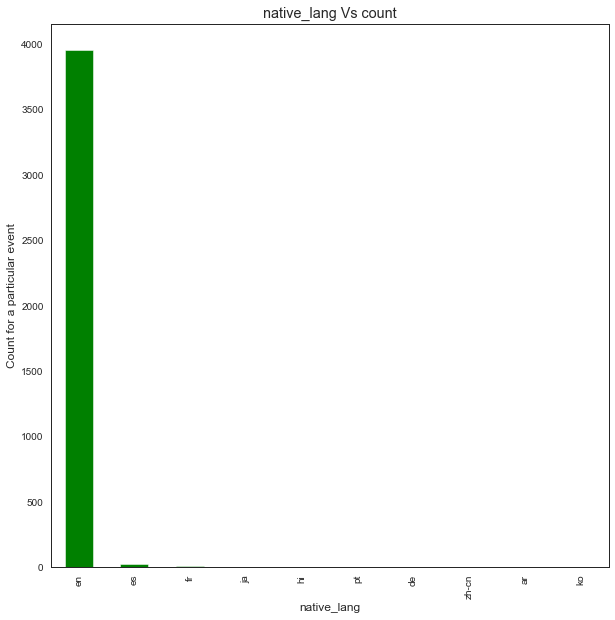

In [237]:
plt.figure(figsize = (10,10))
check_unique_and_top_ten(df, 'native_lang', 'g')


### Duration Column

Percentage of events having run time greater than average:  0.5126092384519351
Number of events having run time greater than average:      2053




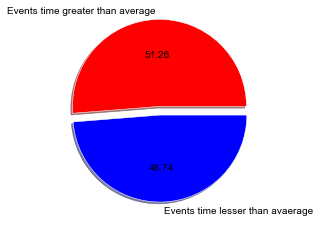

724.0112359550562

In [238]:
print('Percentage of events having run time greater than average: ', len(df[df['duration'] > df['duration'].mean()])/ len(df))
print('Number of events having run time greater than average:     ', len(df[df['duration'] > df['duration'].mean()]))
print()
print()
colors = ( "red", "blue")
explode = (0.1, 0)

categories = ['Events time greater than average', 'Events time lesser than avaerage']  
data = [len(df[df['duration'] > df['duration'].mean()])/ len(df), 1-len(df[df['duration'] > df['duration'].mean()])/ len(df)]

# Creating plot
fig = plt.figure(figsize =(10, 4))
plt.pie(data, labels = categories, explode = explode,autopct='%.2f', colors = colors, shadow = True,textprops = dict(color ="black") )
  
# show plot
plt.show()
( df['duration'].mean())

## All_speakers

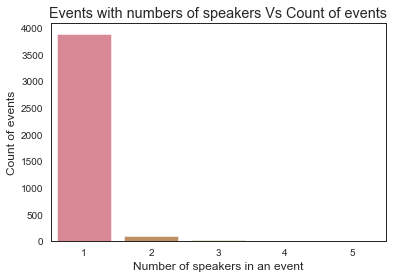

In [239]:
# There were Nan values but there type was wrong, I have changed them to str.
# I jhave also converted all strings to dictionaries
df['all_speakers'].fillna("{0:['NaN']}",inplace=True,axis=0)
df['all_speakers'] = df['all_speakers'].apply(ast.literal_eval)

sns.countplot(df['all_speakers'].apply(lambda x: len(x)));
plt.xlabel('Number of speakers in an event');
plt.ylabel('Count of events');
plt.title('Events with numbers of speakers Vs Count of events');


In [240]:
df.groupby('native_lang').apply(lambda x: x['views'].describe().T).round(2)

views,count,mean,std,min,25%,50%,75%,max
native_lang,,,,,,,,
ar,1.0,1452611.00,NaN,1452611.0,1452611.0,1452611.0,1452611.0,1452611.0
de,1.0,884881.00,NaN,884881.0,884881.0,884881.0,884881.0,884881.0
en,3957.0,2163597.34,3467708.24,0.0,892230.0,1383808.0,2147410.0,65051954.0
es,27.0,689803.19,728588.09,0.0,265413.0,548242.0,723246.0,3103096.0
fr,9.0,982584.56,1320639.35,31500.0,358484.0,662714.0,852585.0,4403974.0
hi,2.0,576852.00,52678.04,539603.0,558227.5,576852.0,595476.5,614101.0
it,1.0,3466037.00,NaN,3466037.0,3466037.0,3466037.0,3466037.0,3466037.0
ja,3.0,680284.33,1044945.17,41919.0,77331.5,112744.0,999467.0,1886190.0
ko,1.0,2057706.00,NaN,2057706.0,2057706.0,2057706.0,2057706.0,2057706.0


## Occupations

In [241]:
# Changing type of occupations column from str to dict
df['occupations'].fillna("{0:['NaN']}",inplace=True,axis=0)
df['occupations'] = df['occupations'].apply(ast.literal_eval)
df['extracted_occupations'] = df['occupations'].apply(lambda x:  x.values())


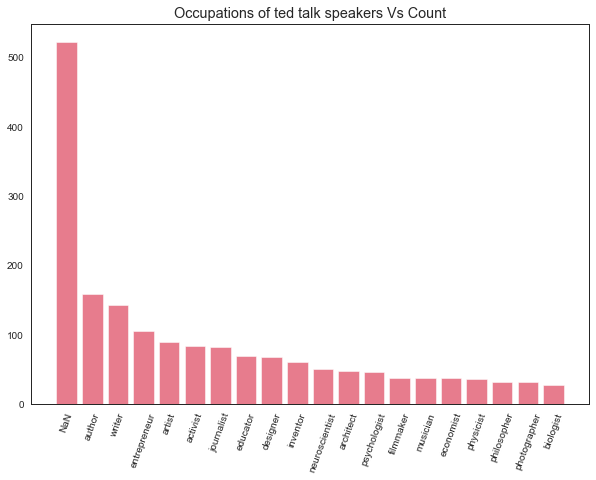

In [242]:
# Flattening the list of values from dictionary, replacing ',' with ';' as I would be splitting on that later
extracted_occupations_list_flattened = df['extracted_occupations'].apply(lambda x : ((';'.join(list(itertools.chain.from_iterable(x)))).replace(',', ';').split(';')))

# Creating a dictionary of occupations alongside their count
dict_occupation = {}
for main_list in extracted_occupations_list_flattened.values:
    for sub_list in main_list:
        if sub_list in dict_occupation:
            dict_occupation[sub_list]+=1
        else:
            dict_occupation[sub_list]=1

# Sorting the dictionary in descending order
sorted_dict_occupation = (sorted(dict_occupation.items(), key=lambda x: x[1], reverse=True))

# Taking top 20 professions according to count
sorted_dict_occupation_top_20 = sorted_dict_occupation[:20]

# PLotting top 20 professions
plt.figure(figsize = (10,7))
plt.bar(range(len(sorted_dict_occupation_top_20)), [val[1] for val in sorted_dict_occupation_top_20], align='center')
plt.xticks(range(len(sorted_dict_occupation_top_20)), [val[0] for val in sorted_dict_occupation_top_20])
plt.xticks(rotation=70)
plt.title('Occupations of ted talk speakers Vs Count');

plt.show()

In [243]:
df['about_speakers'].fillna("{0:['NaN']}",inplace=True,axis=0)
df['about_speakers'] = df['about_speakers'].apply(ast.literal_eval)


## Numerical Columns

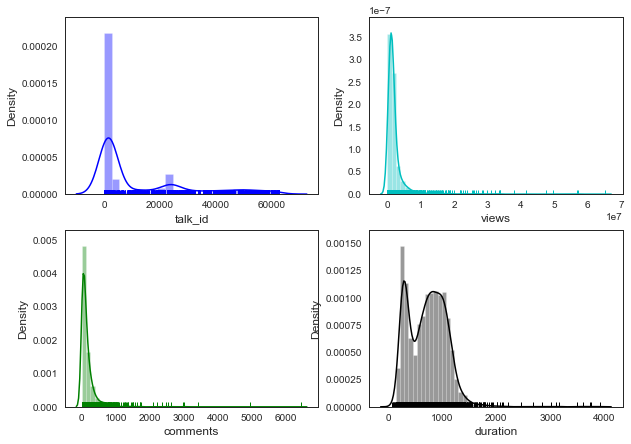

In [244]:
plt.figure(figsize = (10,15))
colours=['b','c','g','k']

for i in range(len(numerical)):
    sns.set_style(style='white')
    plt.subplot(4,2,i+1)
    sns.distplot(df[numerical[i]], hist=True, rug=True, color = colours[i])

> **All are right skewed.**

In [245]:
df.corr()

,talk_id,views,comments,duration
talk_id,1.000000,-0.113291,-0.232926,-0.261955
views,-0.113291,1.000000,0.500748,0.073642
comments,-0.232926,0.500748,1.000000,0.175234
duration,-0.261955,0.073642,0.175234,1.000000


## Recorded Date Vs Published Date

In [246]:
# Index of Nan value
print('Index of row which has the nan value: ', df[df['recorded_date'].isna()].index[0])

df.drop(df[df['recorded_date'].isna()].index[0], inplace = True)

Index of row which has the nan value:  3831


In [247]:
df[df['published_date'].isna()]

df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime((x),"%Y-%m-%d"))
df['published_date']

0      2006-06-27
1      2006-06-27
2      2006-06-27
3      2006-06-27
4      2006-06-27
          ...    
4000   2020-04-27
4001   2020-04-27
4002   2020-04-28
4003   2020-04-30
4004   2020-04-30
Name: published_date, Length: 4004, dtype: datetime64[ns]

In [248]:

df['recorded_date'] = df['recorded_date'].apply(lambda x: datetime.datetime.strptime((x),"%Y-%m-%d"))

df['recorded_date'] 

0      2006-02-25
1      2006-02-22
2      2006-02-24
3      2006-02-26
4      2006-02-25
          ...    
4000   2020-04-22
4001   2020-04-27
4002   2019-06-22
4003   2020-04-28
4004   2020-04-30
Name: recorded_date, Length: 4004, dtype: datetime64[ns]

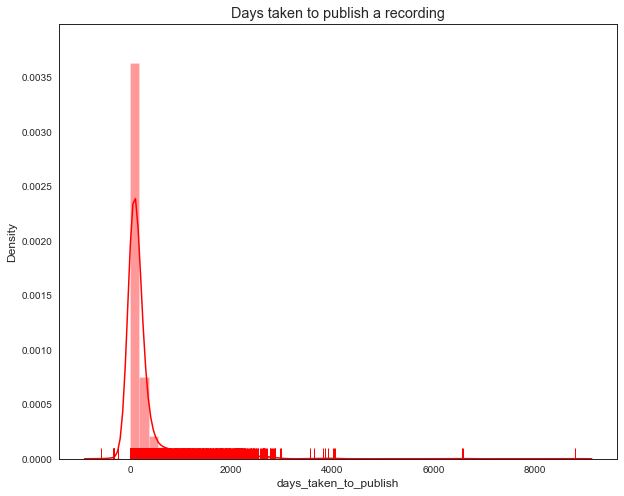

In [249]:
# Days taken for publishing the records from recording time
df['days_taken_to_publish'] = (df['published_date'] - df['recorded_date']).apply(lambda x :  x.days)
plt.figure(figsize = (10,8))
sns.distplot((df['days_taken_to_publish']), hist=True, rug=True, color = 'r');
plt.title('Days taken to publish a recording');

In [250]:
print("Average number of days for a record to get published: ", df['days_taken_to_publish'].mean())

Average number of days for a record to get published:  307.22227772227774


## Number of events published through the years

In [251]:

years = df["published_date"].dt.year.value_counts().sort_index(ascending=True)

fig=px.line(x=years.index,y=years.values,
           labels={"y":"Number of events","x":"Year"},
      title="Number of events published through the years",
       color_discrete_sequence=["#31bf9b"],
       range_x=[min(list(years.index)), max(list(years.index))],
      )
fig.update_layout(

    title_font_color="#fff",paper_bgcolor="#000000",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4")

fig.update_yaxes(showgrid=False,visible=False,title="percent of comments")
fig.update_xaxes(tickfont_size=9)

for i,value in enumerate(years[years==years.max()].index):
    fig.add_vline(x=value) 
fig.show() 

In [252]:
ratio_comments_by_views = pd.DataFrame(df.groupby('event').sum()['comments']/df.groupby('event').sum()['views'].sort_values(ascending = False), columns = ['comment/views'])
ratio_comments_by_views = ratio_comments_by_views.sort_values(by = 'comment/views', ascending = False)


fig = px.bar( x=ratio_comments_by_views['comment/views'][:20], y=ratio_comments_by_views.index[:20], text = ratio_comments_by_views['comment/views'][:20], title = 'ratio of comments by views for top 10 ted talk events', labels={'x': 'Event name','y':'ratio of comments by views'})
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#000000",title_font_size=20,title_x=.5,font_color="#fff",
    plot_bgcolor="#D0D3D4")
fig.show()

## Boxplots for numerical data

In [253]:
plt.figure(figsize= (7,10))
for i in range(len(numerical)):
    sns.set_style(style='white')
    fig.update_layout(
    title_font_color="#fff",paper_bgcolor="#000000",title_font_size=20,title_x=.5,font_color="#fff",
    plot_bgcolor="#D0D3D4")

    fig = px.box(df, y=numerical[i], points = 'all')
    fig.show()

<Figure size 504x720 with 0 Axes>

## Number of topics spoken on in an event

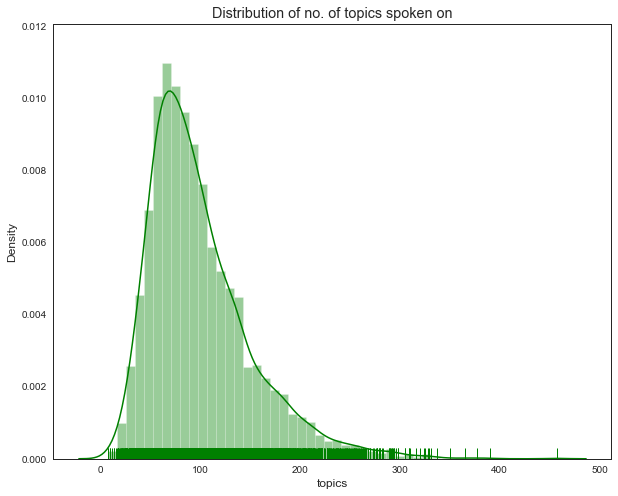

In [254]:
plt.figure(figsize = (10,8))
sns.distplot(df['topics'].apply(lambda x: len(x)), hist=True, rug=True, color = 'g');
plt.title('Distribution of no. of topics spoken on');

In [255]:
number_of_topics_df = pd.DataFrame({'event_name': df['event'], 'number_of_topics': df['topics'].apply(len)}).groupby('event_name').sum().sort_values(by ='number_of_topics', ascending = False)
values = number_of_topics_df['number_of_topics'].values[:20]
event_name = number_of_topics_df.index.values[:20]

plt.figure(figsize = (10,20))
fig = px.bar(s, x=values, y=event_name, title = 'Top 20: Number of topics spoken on in an event', text = values, orientation = 'h', labels={'x': 'Event name','y':'Number of topics spoken on in an event'})
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#000000",title_font_size=20,title_x=.5,font_color="#fff",
    plot_bgcolor="#D0D3D4")
fig.show()

<Figure size 720x1440 with 0 Axes>

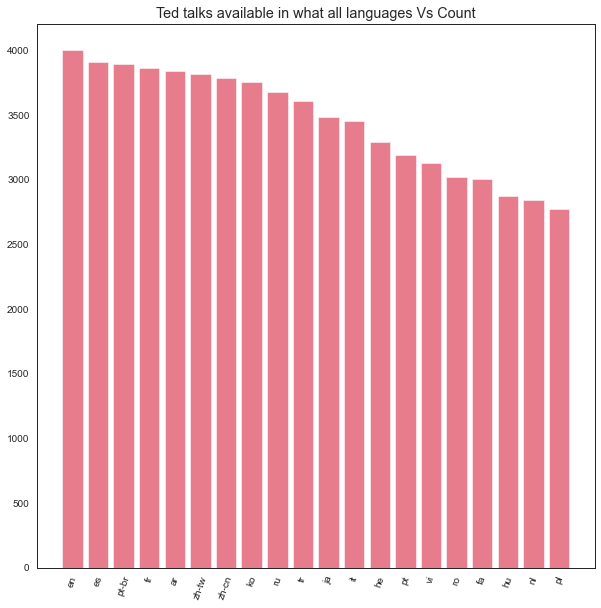

In [256]:
# Creating a dictionary of available language alongside their count
df['available_lang'] = df['available_lang'].apply(ast.literal_eval)
dict_available_lang = {}
for main_list in df['available_lang'].values:
    for sub_list in main_list:
        if sub_list in dict_available_lang:
            dict_available_lang[sub_list]+=1
        else:
            dict_available_lang[sub_list]=1


# Sorting the dictionary in descending order
sorted_dict_available_lang = (sorted(dict_available_lang.items(), key=lambda x: x[1], reverse=True))

sorted_dict_available_lang

sorted_dict_available_lang_top_20 = sorted_dict_available_lang[:20]

# PLotting top 20 professions
plt.figure(figsize = (10,10))
plt.bar(range(len(sorted_dict_available_lang_top_20)), [val[1] for val in sorted_dict_available_lang_top_20], align='center')
plt.xticks(range(len(sorted_dict_available_lang_top_20)), [val[0] for val in sorted_dict_available_lang_top_20])
plt.xticks(rotation=70)
plt.title('Ted talks available in what all languages Vs Count');

plt.show()

Text(0.5, 1.0, 'Duration vs. Views')

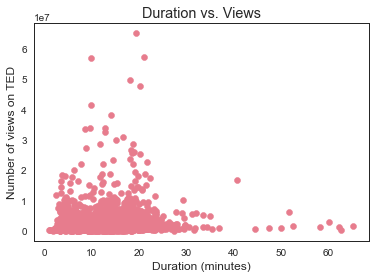

In [257]:
plt.scatter(df['duration']/ 60, df['views'])
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of views on TED")
plt.title("Duration vs. Views")


Text(0.5, 1.0, 'Duration vs. comments')

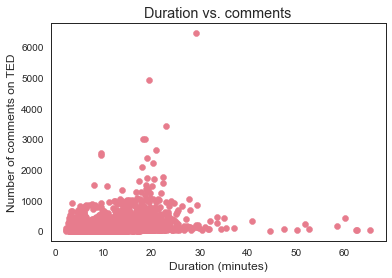

In [258]:
plt.scatter(df['duration']/ 60, df['comments'])
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of comments on TED")
plt.title("Duration vs. comments")


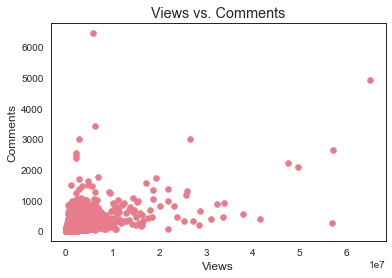

In [259]:
plt.scatter(df['views'], df['comments'])
plt.xlabel('Views');
plt.ylabel('Comments');
plt.title("Views vs. Comments");

In [260]:
import string
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

                 

def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [261]:
import re
df['transcript'] = df['transcript'].apply(clean_the_tweet)
df.reset_index(drop=True, inplace = True)

In [262]:
df['transcript'] = df['transcript'].apply(text_process)
df.reset_index(drop=True, inplace = True)

In [263]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, min_df = .01, max_df = .90)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [264]:
s = df[['transcript','duration', 'views', 'days_taken_to_publish']]
y = s['views']
X = s.drop('views', axis =1)

In [265]:
xtrain_description = df['transcript'].iloc[:3203]
xest_description = df['transcript'].iloc[3203:]



In [266]:
x_train_idf = vectorizer.fit_transform(xtrain_description)
x_test_idf = vectorizer.transform(xest_description)

In [267]:
x_train_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [268]:
x_df_ = pd.concat([pd.DataFrame(data = x_train_idf.toarray(), columns = vectorizer.get_feature_names()), pd.DataFrame(data = x_test_idf.toarray(), columns = vectorizer.get_feature_names())])

In [269]:
xt = s[['duration', 'days_taken_to_publish']]
y = s['views']




In [272]:
xt.rename(columns={'duration': 'duration2'}, inplace = True)
final_x = x_df_.join(xt)

In [ ]:
'duration' in x_df_.columns

In [273]:
xtrain_ = final_x.iloc[:3203]
xest_ = final_x.iloc[3203:]


ytrain_ = y.iloc[:3203]
yest_ = y.iloc[3203:]


In [274]:
import xgboost as xgb
xgb_model= xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(xtrain_, ytrain_)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [275]:
xgb_r2_test= xgb_model.score(xest_, yest_)
xgb_r2_test

-0.7316593926422896

## the comments of 20 speakers who have the highest number of views

In [276]:
dfs = df.sort_values(by='views',ascending=False)
dfs.dropna(inplace = True)
dfs20 = dfs.iloc[:20, :]
data = [
    {
        'y': dfs20.views,
        'x': dfs20.index,
        'mode': 'markers',
        'marker': {
            'color': dfs20.duration,
            'showscale': True,
            'size': (dfs20.comments)/100,
        },
        "text" :  df.speaker_1
    }
]
iplot(data)

In [277]:
data_2014=df.comments[df.event=='TED2014']
data_2015=df.comments[df.event=='TED2015']
    
trace2 = go.Histogram(
    x=data_2014,
    opacity=0.75,
    name = "2014",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))
trace3 = go.Histogram(
    x=data_2015,
    opacity=0.75,
    name = "2015",
    marker=dict(color='rgba(125, 2, 100, 0.6)'))
data = [trace2, trace3]
layout = go.Layout(barmode='overlay',
                   title=' Comments in 2014 and 2015',
                   xaxis=dict(title='number of comments'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [278]:
def data_according_to_year(df, col, data_for_year):
    data_ = df[df[col].dt.year==data_for_year]
    labels=data_.event
    # figure
    fig = {
      "data": [
        {
          "values": data_.views,
          "labels": labels,
          "domain": {"x": [0, .5]},
          "name": "Number Of Views Rates",
          "hoverinfo":"label+percent+name",
          "hole": .3,
          "type": "pie"
        },],
      "layout": {
            "title":"The Number of ted talks events published in " + str(data_for_year),
            "annotations": [
                { "font": { "size": 20},
                  "showarrow": False,
                  "text": "Number of Views",
                    "x": 0.30,
                    "y": 1.10
                },
            ]
        }
    }
    iplot(fig)
data_according_to_year(df, 'published_date', 2008)

In [323]:
z = df[['comments', 'duration', 'days_taken_to_publish', 'avearge_views', 'views']]
z['comments'].fillna(z['comments'].mean(), inplace = True)

In [324]:
y =z['views']
x = z.drop('views', axis =1)
x_train,y_train,x_test, y_test = train_test_split(x,y, test_size =.2)

In [326]:
import xgboost as xgb
xgb_model= xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)


AssertionError: 